# Predicting Diabetes with Machine Learning

Welcome to this exciting project where we dive into the world of machine learning to predict the onset of diabetes! In this repository, we'll explore a real-world dataset, preprocess the data, visualize patterns, train a machine learning model, and even allow you to make predictions based on your own input.

### Introduction

Diabetes is a chronic condition that affects millions of people worldwide. Early detection and prevention are crucial in managing this disease. In this project, we'll leverage the power of machine learning to build a model that can predict the likelihood of an individual developing diabetes based on various health indicators.

We'll be working with the Pima Indians Diabetes dataset, which includes features such as Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age. Our goal is to train a logistic regression model that can accurately classify individuals as either having diabetes or not.

![separator2](https://i.imgur.com/4gX5WFr.png)

In [1]:
import pandas as pd      
import numpy as np          
import matplotlib.pyplot as plt         
import seaborn as sns           
import plotly.express as px         
from plotly.subplots import make_subplots          
from sklearn.model_selection import train_test_split            
from sklearn.linear_model import LogisticRegression         
from sklearn.metrics import classification_report          
from sklearn.preprocessing import StandardScaler       
from tensorflow import keras               
import tensorflow as tf             
import warnings
warnings.filterwarnings('ignore')

![separator2](https://i.imgur.com/4gX5WFr.png)

# Data Exploration

Before we dive into model building, let's explore the dataset and gain some insights. We'll start by loading the data and checking for missing values and duplicates.

In [2]:
df=pd.read_csv(r"C:\Users\moham\OneDrive\SUHAIB\SCHOOLWORK\GRADE 11\SCIENCE\COMPUTER SCIENCE\data\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
isnull=df.isnull().sum()

fig=px.imshow(isnull.to_frame(),color_continuous_scale='viridis',)

fig.update_layout(width=600)
fig.show()

![separator2](https://i.imgur.com/4gX5WFr.png)

# Correlation Analysis

Understanding the relationships between different features can provide valuable insights for feature selection and model interpretation. Let's visualize the correlation matrix using a heatmap.

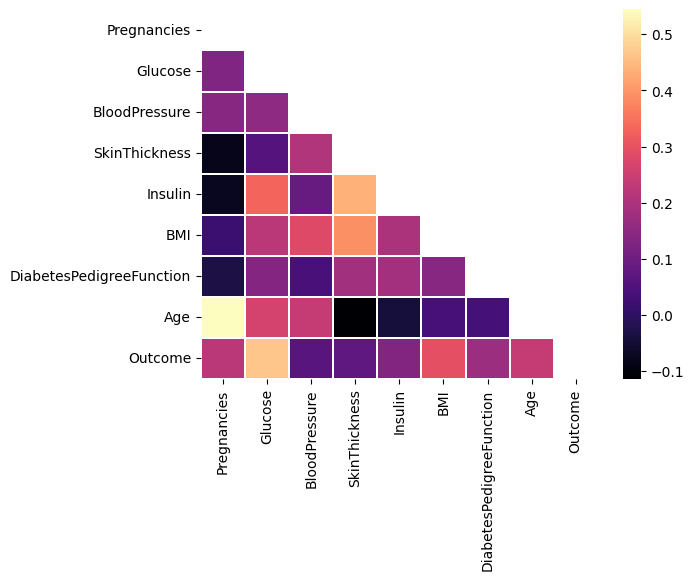

In [7]:
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,linewidths=0.1,cmap='magma')
plt.show()

The darker colors indicate higher positive correlation, while lighter colors represent negative correlation. From the heatmap, we can identify features that are highly correlated with the target variable (Outcome) and potentially prioritize them during model building.

![separator2](https://i.imgur.com/4gX5WFr.png)

Next, we'll visualize the dataset using boxplots to understand the distribution of each feature and identify potential outliers.

In [8]:
def custom_boxplots(dataset,column_list,columns,suptitle):
    fig=make_subplots(rows=(len(column_list)//columns)+1,cols=columns,subplot_titles=column_list)
    fig.update_layout(height=1000,width=300*columns,title=suptitle)
    for i,data in enumerate(column_list):
        row=i//columns+1
        col=i%columns+1
        fig.add_trace(px.box(x=dataset[data]).data[0],row=row,col=col)
    fig.show()
custom_boxplots(df,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],columns=3,suptitle="Boxplots for Diabetes Dataset")


As you can see from the image, there are some extreme outliers present in the dataset, which we'll need to handle before proceeding.

![separator2](https://i.imgur.com/4gX5WFr.png)

# Handling Outliers

Outliers can significantly impact the performance of our machine learning model. To address this issue, we'll define a function that replaces outlier values with the mean of the respective column using the interquartile range (IQR) method.

In [9]:
def handle_ouliers_mean(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])
for i in range (4):     
    handle_ouliers_mean(df)


After applying this function 4 to our dataset, let's visualize the boxplots again to see the effect.

In [10]:
def custom_boxplots(dataset,column_list,columns,suptitle):
    fig=make_subplots(rows=(len(column_list)//columns)+1,cols=columns,subplot_titles=column_list)
    fig.update_layout(height=1000,width=300*columns,title=suptitle)
    for i,data in enumerate(column_list):
        row=i//columns+1
        col=i%columns+1
        fig.add_trace(px.box(x=dataset[data]).data[0],row=row,col=col)
    fig.show()
custom_boxplots(df,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],columns=3,suptitle="Boxplots for Diabetes Dataset")


As you can observe, the extreme outliers have been effectively handled, and the distributions now appear more well-behaved.

![separator2](https://i.imgur.com/4gX5WFr.png)

# Model Training

Now, it's time to train our logistic regression model! We'll start by splitting the dataset into training and testing sets, scaling the features, and defining the model architecture.

In [11]:
class epochcall(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print()
            print('Epoch: {:d}, '.format(epoch), end='')
            for name, value in sorted(logs.items()):
                print('{}:{:0.4f}'.format(name, value), end=', ')
            print()
        print('.', end='')

In [12]:
# Split data into features and target
scaler= StandardScaler()
X = df.to_numpy()[:,0:8] 
y= df.to_numpy()[:,8]
X=scaler.fit_transform(X)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a logistic regression model using TensorFlow
model = tf.keras.models.Sequential([                                                                                                        #type:ignore
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),                                                          #type:ignore
    tf.keras.layers.Dense(1, activation='sigmoid')                                                                                          #type:ignore
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We'll train the model for 100 epochs and monitor the performance using a custom callback function. After training, we'll evaluate the model's performance on the test set and visualize the loss and accuracy curves.

In [13]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[epochcall()],verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')




Epoch: 0, accuracy:0.5608, loss:0.7762, val_accuracy:0.6042, val_loss:0.7354, 
6/6 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7552..............
Loss: 0.5554178357124329, Accuracy: 0.7552083134651184


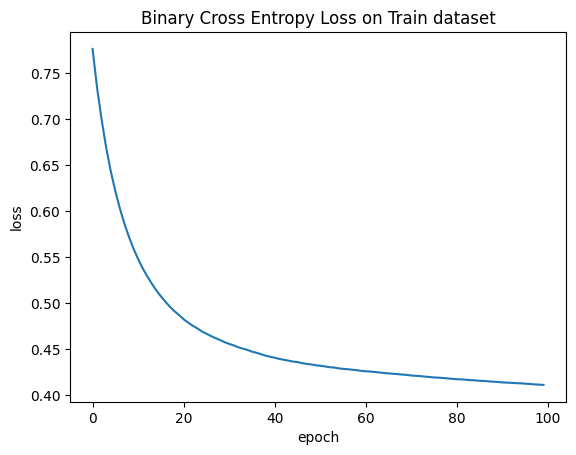

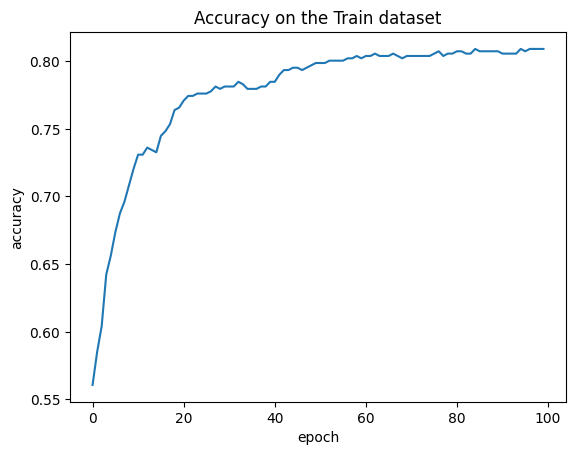

In [14]:
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the Train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

The loss plot shows a steady decrease in the binary cross-entropy loss, while the accuracy plot indicates that our model achieves high accuracy on the training dataset.

![separator2](https://i.imgur.com/4gX5WFr.png)

# Making Predictions

Finally, the moment you've been waiting for! We'll provide a simple interface where you can input your own values for the features, and our trained model will predict the likelihood of developing diabetes.

In [17]:
# Split the dataframe into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Calculate mean and standard deviation for each feature column
mean_values = X.mean(axis=0).values.reshape(1, -1)                      #type:ignore
std_values = X.std(axis=0).values.reshape(1, -1)                        #type:ignore

# Demo values for testing
pregnancies=eval(input('Enter Pregnancies'))
glucose = eval(input('Enter Glucose'))
blood_pressure = eval(input('Enter Blood pressure'))
skin_thickness = eval(input('Enter skin thickness'))
insulin = eval(input('Enter insulin'))
bmi = eval(input('Enter bmi'))
diabetes_pedigree_function = eval(input('Enter diabetes pedigree function'))
age = eval(input('Enter age'))

# Create a numpy array from the demo values
user_input = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]])
# Preprocess the user input using the mean and standard deviation
user_input_scaled = (user_input - mean_values) / std_values

# Make a prediction
prediction1=model.predict(user_input_scaled)
# Print the prediction
print('Prediction:',prediction1[0][0])

1/1 [==============================] - 0s 80ms/step
Prediction: 0.15837131


Simply run the script, enter the requested values, and the model will output the predicted probability of having diabetes. Pretty cool, right?


![separator2](https://i.imgur.com/4gX5WFr.png)


# Conclusion
In this project, we've explored the Pima Indians Diabetes dataset, preprocessed the data, visualized patterns, trained a logistic regression model, and even provided a way to make predictions based on user input. We've covered various aspects of the machine learning pipeline, from data exploration to model evaluation.

Feel free to explore the code, experiment with different modeling techniques, or even try out different datasets. The possibilities are endless in the world of machine learning!

If you have any questions or suggestions, please don't hesitate to reach out. Happy coding!

